In [1]:
from dataset import MiniImagenetDataset
from network import SiameseNetwork
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch


C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


## Test and Visualization for Mini Imagenet Dataset
1. load dataset and model

In [2]:
dataset = MiniImagenetDataset("../Dataset/imagenet-mini/train", k=1, n=5)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
model = SiameseNetwork()
checkpoint = torch.load("./checkpoints/best.pth")
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()



C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\albumentations\core\validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
c:\Users\Admin\anaconda3\envs\cspg\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\cspg\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Admin\AppData\Local\Temp\ipykernel_39344\4066857690.py:4: FutureWarning: You are using `torch.

SiameseNetwork(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

2. inference random two images and visualize with similarity prediction (re-run this cell to see another inference result)

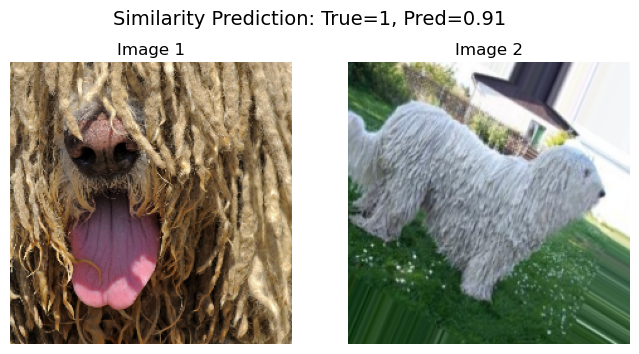

In [ ]:
# calculate similarity
img1, img2, y = next(iter(dataloader))
y_pred = model(img1,img2)

# visualize
img1_np = img1[0].permute(1, 2, 0).cpu().numpy() 
img2_np = img2[0].permute(1, 2, 0).cpu().numpy()  

if img1_np.max() <= 1.0:
    img1_np = (img1_np * 255).astype("uint8")
    img2_np = (img2_np * 255).astype("uint8")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(img1_np)
axes[0].set_title("Image 1")
axes[0].axis("off")

axes[1].imshow(img2_np)
axes[1].set_title("Image 2")
axes[1].axis("off")

plt.suptitle(f"Similarity Prediction: True={y.item()}, Pred={y_pred.item():.2f}", fontsize=14)
plt.show()

## Test and Visualization for My Photo Album
1. load model

In [14]:
import os
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import torch
import random
from network import SiameseNetwork
from typing import List

model = SiameseNetwork()
checkpoint = torch.load("./checkpoints/best.pth")
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()


C:\Users\Admin\AppData\Local\Temp\ipykernel_39344\1154229632.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("./checkpoints/best.pth")


SiameseNetwork(
  (feature_extractor): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affin

2. Define my photo gallery classes with representative images

In [15]:
def load_image(image_path:str)->torch.Tensor:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = A.Compose([
        A.Resize(224, 224),
        A.ToTensorV2()
    ])
    img_tensor = transform(image=img)['image']
    img_tensor = img_tensor.float() / 255.0
    img_tensor = img_tensor.unsqueeze(0)
    return img_tensor

# set representative image for each gallery
gallery_path = "C:\\workspace\\Dataset\\photos"
popn = load_image(os.path.join(gallery_path, "20190101_004626.jpg"))
gitadora = load_image(os.path.join(gallery_path, "20190103_220116.jpg"))
pump = load_image(os.path.join(gallery_path, "20190110_011029.jpg"))
iidx = load_image(os.path.join(gallery_path, "20190507_224953.jpg"))

3. pick random unclassified photo and identify which gallery will be the best. (re-run this cell to see another result)

The target image is popn image


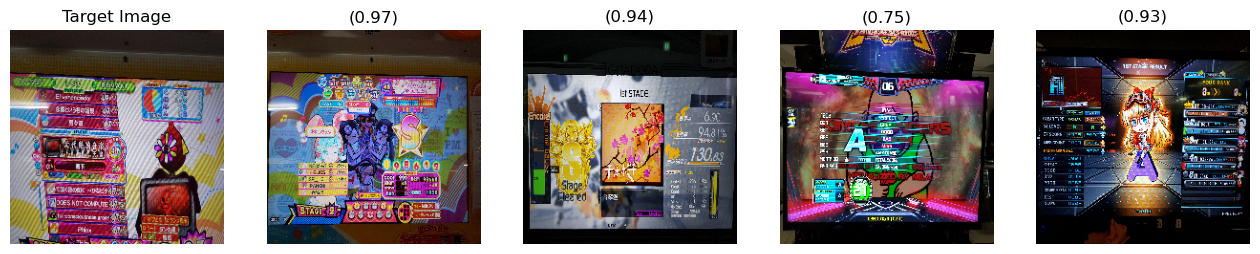

In [ ]:
# pick random unclassified photo
unclassified_photos_path = "C:\\workspace\\Dataset\\photos\\unclassified"
target_image_path = random.choice(os.listdir(unclassified_photos_path))
target_image = load_image(os.path.join(unclassified_photos_path, target_image_path))

# calculate similarity with each pre-defined galleries
popn_sim = model(target_image, popn)
gitadora_sim = model(target_image, gitadora)
pump_sim = model(target_image, pump)
iidx_sim = model(target_image, iidx)

# do visualization
def visualize_gallery_similarity(target_image:torch.Tensor, gallery_images:List[torch.Tensor], similarities: List[torch.Tensor]):
    
    num_gallery = len(gallery_images)
    fig, axes = plt.subplots(1, num_gallery+1, figsize=(16,4))
    target_image_np = target_image[0].permute(1, 2, 0).cpu().numpy() 

    axes[0].imshow(target_image_np)
    axes[0].set_title("Target Image")
    axes[0].axis("off")

    for i in range(num_gallery):
        gallery_image_np = gallery_images[i][0].permute(1, 2, 0).cpu().numpy() 
        axes[i+1].imshow(gallery_image_np)
        axes[i+1].set_title(f"({similarities[i].item():.2f})")
        axes[i+1].axis("off")

gallery_images = [popn, gitadora, pump, iidx]
similarities = [popn_sim, gitadora_sim, pump_sim, iidx_sim]
visualize_gallery_similarity(target_image, gallery_images, similarities)

max_index = similarities.index(max(similarities))

# if any of similarity values does not exceed 0.9, remain as unclassified
if 0.9 < max(similarities):
    print(f"The target image is {['popn','gitadora','pump','iidx'][max_index]} image")
else:
    print("The target image is unclassified")
